# 변동성과 위험 (Volatility and Risk), Sharpe Ratio
### 변동성 
변동성(Volatility)은 투자자산의 가격 변동을 나타내는 측정치입니다. 주식, 채권, 상품 등 다양한 자산의 가격은 시간에 따라 변동하며, 이 변동의 크기와 빈도를 측정하는 것이 변동성입니다. 변동성이 높다는 것은 가격 변동의 크기가 크거나 빈도가 높아 불확실성이 높은 상태를 의미하며, 이는 고위험이라고 볼 수 있습니다.

변동성을 측정하는 일반적인 방법 중 하나는 표준편차를 사용하는 것입니다. 표준편차는 관찰값들이 평균으로부터 얼마나 떨어져 있는지를 측정하는 통계학적인 개념입니다. 변동성을 계산할 때, 일반적으로 각 관찰치(예: 일일 수익률)과 평균 관찰치간의 차이를 제곱하여 평균을 낸 후, 그 결과값의 제곱근을 구합니다. 이렇게 계산된 값이 표준편차이며, 이를 변동성이라고 부릅니다.

### Sharpe Ratio
Sharpe Ratio는 위험 대비 수익률을 측정하는 지표로, 투자의 성과를 평가하는 데 사용됩니다. Sharpe Ratio는 예상 수익률을 초과하는 수익률(초과수익률)을 투자의 위험(표준편차 또는 변동성)으로 나눈 것입니다. Sharpe Ratio가 높을수록 동일한 위험 수준에서 더 많은 초과 수익을 얻을 수 있다는 것을 의미합니다. 따라서 Sharpe Ratio는 투자 선택지를 비교할 때 효율적인 도구로 활용될 수 있습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import korean

In [2]:
# CSV 파일로부터 주가 데이터를 불러옵니다.
prices = pd.read_csv("data/sample_prices.csv")

# 주가 데이터에서 일일 수익률을 계산합니다.
# pct_change() 함수는 이전 행과 비교하여 퍼센트 변동(수익률)을 계산합니다.
returns = prices.pct_change()

returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [3]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


표준 편차를 계산합니다.  
$$(편차) = (각 변량) - (전체 평균)$$  
$$(분산) = \frac{편차의 제곱의 합}{총 변량의 갯수}$$
$$(표준편차) = 분산의 제곱근 (\sqrt{분산})$$

In [4]:
#편차
deviations = returns - returns.mean()  
#편차의 제곱
squared_deviations = deviations ** 2

#분산 = 편차의 제곱의 평균
mean_squared_deviations = squared_deviations.mean()
# 표준편차 (변동성)
volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

내장된 `.std()` 메소드를 사용할 때도 같은 답이 나와야 하는데 약간의 차이가 납니다.  

ddof 인자는 "Delta Degrees of Freedom"의 약자로, 표준편차나 분산을 계산할 때 사용하는 분모의 조정값을 의미합니다. 기본값은 1로 설정되어 있으며, 이는 공식에서 N-1을 의미합니다. N은 데이터의 개수입니다. 이렇게 N-1을 사용하는 이유는 표본의 분산이나 표준편차를 계산할 때 편향되지 않은(unbiased) 추정값을 얻기 위함입니다.

그러나 ddof=0을 설정하면 분모는 N으로 설정되며, 이는 전체 데이터셋의 표준편차를 계산할 때 사용됩니다. 이는 표본이 아닌 모집단의 표준편차를 계산하는 것으로 볼 수 있습니다.

따라서, returns.std(ddof=0)은 'returns' 데이터셋의 모집단 표준편차를 계산합니다.

In [5]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [6]:
returns.std(ddof=0)

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [7]:
returns.shape

(12, 2)

In [8]:
volatility = returns.std()

print('두 자산의 변동성\n', volatility)

두 자산의 변동성
 BLUE      0.023977
ORANGE    0.079601
dtype: float64


# 연간 변동성 (Annualizing Volatility) 

월간 수익률을 기반으로 한 변동성을 연간 변동성으로 변환하려면, 월간 표준편차를 월 수의 제곱근(예를 들어 연간으로 변환할 경우 12의 제곱근)으로 곱해야 합니다. 이렇게 하면 시간 스케일에 따른 변동성을 비교할 수 있습니다.

`np.sqrt()`를 사용하는 대신 $0.5$의 거듭제곱으로 올릴 수도 있습니다.  

이런 방식으로 환산하는 이유는, 변동성이 랜덤 워크(random walk)와 같은 확률 과정에 의해 주도된다고 가정하기 때문입니다. 랜덤 워크의 경우, 시간 경과에 따른 변동(즉, 위험 또는 변동성)은 시간의 제곱근에 비례하게 됩니다. 이는 통계학과 확률 이론에서 자주 등장하는 개념으로, 주가의 움직임을 묘사하는데 자주 사용됩니다.

In [9]:
# 월별 수익률의 표준편차(변동성)를 계산한 후 연간 변동성으로 변환합니다.
# returns.std()는 월별 수익률의 표준편차(월별 변동성)를 계산합니다.
# 여기에 √12를 곱해 연간 변동성(Annualized Volatility)을 계산합니다.
# √12를 곱하는 이유는 1년이 12개월이므로, 월별 변동성을 연간 변동성으로 변환하기 위해서입니다.
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [10]:
# np.sqrt(12) == 12**0.5
annualized_vol = returns.std() * (12**0.5)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

## 위험 조정 수익 (Risk Adjusted Returns)

위험 조정 수익이란 투자 수익(investment returns)을 단순히 투입 대비 산출로만 계산하는 것이 아니라, 수익이 나타나는 과정에서 포함된 위험들을 고려했을 때의 수익을 의미한다.

예를 들어 시장에 기본적이고 공통적으로 존재하는 위험이 있어서 이에 대한 보상으로 투자 활동에 3%의 수익률이 있어야 할 때, 한 투자 활동으로부터 5%의 수익을 얻었다면 시장 위험을 조정한 수익으로 볼때는 그 투자활동은 2%의 수익을 얻은 것이다. 

### Sharpe Ratio - 대표적인 위험 조정 수익률 지수  

- Sharpe Ratio 계산 

$$\frac{초과 수익}{변동성} \rightarrow 변동성(위험) \  한\ 단위 당 \ 초과 \ 수익$$

$$SR=\frac{R_p-R_f}{\sigma_p}, \ p: portfolio, f: risk free$$

In [11]:
rf = 0.025

In [12]:
# BLUE 연간 수익률 
BLUE_annualized_return = (1+returns['BLUE']).prod() - 1
# BLUE 연간 변동성
BLUE_annualized_vol = returns['BLUE'].std() * np.sqrt(252)
# BLUE Sharpe Ratio
BLUE_SR = (BLUE_annualized_return - rf) / BLUE_annualized_vol

print("BLUE 자산의 연간 수익률 :", BLUE_annualized_return)
print("BLUE 자산의 연간 변동성 :", BLUE_annualized_vol)
print("BLUE 자산의 위험 조정 수익률 :", BLUE_SR)

BLUE 자산의 연간 수익률 : 0.12331034482758652
BLUE 자산의 연간 변동성 : 0.3806297081316649
BLUE 자산의 위험 조정 수익률 : 0.25828342540614213


In [13]:
# ORANGE 연간 수익률 
ORANGE_annualized_return = (1+returns['ORANGE']).prod() - 1
# ORANGE 연간 변동성
ORANGE_annualized_vol = returns['ORANGE'].std() * np.sqrt(252)
# ORANGE Sharpe Ratio
ORANGE_SR = (ORANGE_annualized_return - rf) / ORANGE_annualized_vol

print("ORANGE 자산의 연간 수익률 :", ORANGE_annualized_return)
print("ORANGE 자산의 연간 변동성 :", ORANGE_annualized_vol)
print("ORANGE 자산의 위험 조정 수익률 :", ORANGE_SR)

ORANGE 자산의 연간 수익률 : 0.08716697936210194
ORANGE 자산의 연간 변동성 : 1.2636309546202742
ORANGE 자산의 위험 조정 수익률 : 0.049197100731663654


### 실제 주식의 Sharpe Ratio 계산
- 1 년간 주식에 투자하여 얻은 수익률 계산

In [14]:
import datetime
import FinanceDataReader as fdr
import pandas as pd

# 분석할 주식의 이름과 티커(Symbol) 리스트
tickers = [['삼성전자', '005930'], ['카카오', '035720'], ['셀트리온', '068270'], ['KT&G', '033780']]

# 주가 데이터를 저장할 데이터프레임 초기화
dataset = pd.DataFrame()
# 일일 수익률 데이터를 저장할 데이터프레임 초기화
daily_returns = pd.DataFrame()

# 시작 날짜와 종료 날짜 설정
start = datetime.date(2020, 1, 1)  # 시작일
end = datetime.date(2024, 8, 31)   # 종료일

# 주어진 티커 목록을 반복하며 데이터를 수집하고 처리
for name, ticker in tickers:
    # 각 주식의 종가 데이터를 FinanceDataReader를 통해 가져옵니다.
    df = fdr.DataReader(ticker, start=start, end=end)
    
    # 주가 데이터에서 'Close' 열을 주식 이름으로 변경
    df.rename(columns={'Close': name}, inplace=True)
    
    # 주가 데이터를 기존 데이터프레임(dataset)에 추가합니다.
    if dataset.empty:
        dataset = df[[name]]
    else:
        dataset = pd.concat([dataset, df[[name]]], axis=1)
    
    # 주가 데이터에서 일일 수익률을 계산합니다.
    df[name] = df[name].pct_change()
    
    # 수익률 데이터에서 첫 번째 NaN 값만 제거합니다.
    df.dropna(subset=[name], inplace=True)
    
    # 계산된 수익률 데이터를 daily_returns 데이터프레임에 추가합니다.
    if daily_returns.empty:
        daily_returns = df[[name]]
    else:
        daily_returns = pd.concat([daily_returns, df[[name]]], axis=1)

# 최종적으로 계산된 일일 수익률 데이터를 출력합니다.
daily_returns

,삼성전자,카카오,셀트리온,KT&G
Date,,,,
2020-01-03,0.005435,0.000000,-0.013894,0.000000
2020-01-06,0.000000,0.013101,-0.025346,0.002162
2020-01-07,0.005405,0.035601,0.028901,0.003236
2020-01-08,0.017921,-0.003114,-0.028089,-0.012903
2020-01-09,0.031690,0.028206,0.023117,0.009804
...,...,...,...,...
2024-08-26,-0.020592,0.033378,0.012346,0.019571
2024-08-27,-0.003942,-0.018088,-0.021951,0.014625
2024-08-28,0.007916,-0.022368,0.004988,-0.010811


일일 수익률 시각화

<Axes: xlabel='Date'>

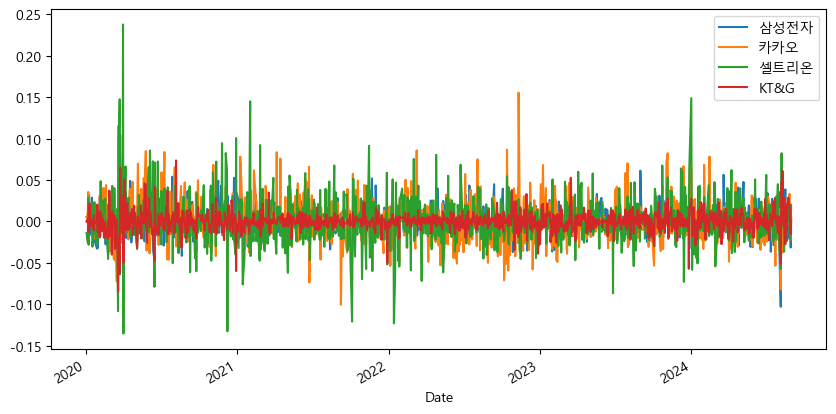

In [15]:
daily_returns.plot()

일일 변동성(volatility)

In [16]:
daily_returns.std()

삼성전자    0.016424
카카오     0.024270
셀트리온    0.027370
KT&G    0.012233
dtype: float64

연간 수익률

In [17]:
annualized_return = (1+daily_returns).prod() - 1
annualized_return

삼성전자    0.346014
카카오     0.215329
셀트리온    0.214711
KT&G    0.169730
dtype: float64

연간 변동성

In [18]:
annualized_vol = daily_returns.std() * np.sqrt(252)
annualized_vol

삼성전자    0.260728
카카오     0.385271
셀트리온    0.434487
KT&G    0.194189
dtype: float64

- Sharpe Ratio 계산 

초과 수익 / 변동성 --> 변동성(위험) 한단위 당 초과 수익

$$SR=\frac{R_p-R_f}{\sigma_p}$$

p: portfolio, f: risk free

In [19]:
#무위험 수익률
riskfree_rate = 0.01 #연간 1%

#초과 수익률
excess_return = annualized_return - riskfree_rate

#샤프지수
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

삼성전자    1.288754
카카오     0.532946
셀트리온    0.471154
KT&G    0.822546
dtype: float64

높은 샤프 지수는 동일한 위험 수준에서 더 높은 예상 수익을 제공하는 투자를 나타냅니다.

위의 샤프 지수에 따르면, "카카오"가 가장 높은 샤프 지수(1.771584)를 가지고 있습니다. 따라서 이 투자가 주어진 위험에 대해 가장 높은 예상 수익률을 제공한다고 볼 수 있습니다.

실제 주가 시각화

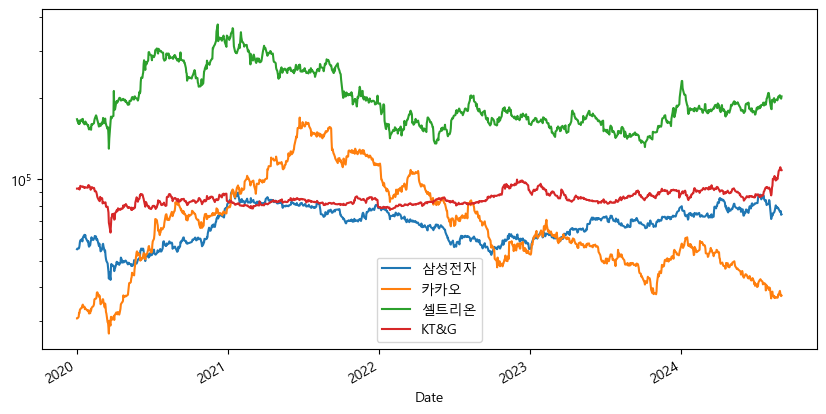

In [20]:
fig, ax = plt.subplots(1, 1)
dataset.plot(ax=ax)
ax.set_yscale('log')

In [21]:
dataset

,삼성전자,카카오,셀트리온,KT&G
Date,,,,
2020-01-02,55200,30609,167118,92500
2020-01-03,55500,30609,164796,92500
2020-01-06,55500,31010,160619,92700
2020-01-07,55800,32114,165261,93000
2020-01-08,56800,32014,160619,91800
...,...,...,...,...
2024-08-26,76100,38700,205000,109400
2024-08-27,75800,38000,200500,111000
2024-08-28,76400,37150,201500,109800
